In [1]:
from lgca import get_lgca
import numpy as np
from matplotlib import pyplot as plt

In [4]:
path = 'smbfigures/'
%matplotlib notebook

In [44]:
%matplotlib inline

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
%matplotlib notebook
l = 50
l_spheroid = 2
ecmdens = 0.5
dims = (l, l)
tmax = 100
restc = 3
rho_0 = 3
nodes = np.zeros((l, l, restc+6), dtype=bool)
nodes[..., :l_spheroid, -rho_0:] = 1
lgca = get_lgca(geometry='hex', interaction='wetting', beta=0., alpha=5, gamma=10, bc='rbc', density=0, restchannels=restc,
                nodes=nodes, rho_0=rho_0)
lgca.r_b = .05
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, :lgca.r_int+l_spheroid] = 1
lgca.ecm = (np.random.random(lgca.spheroid.shape) < ecmdens) & np.invert(lgca.spheroid)

<IPython.core.display.Javascript object>


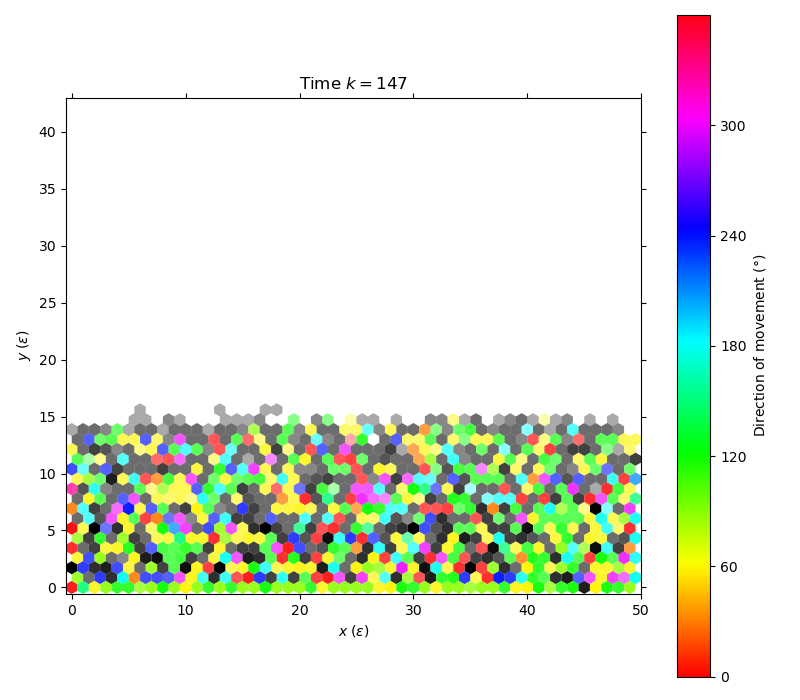

In [19]:
lgca.live_animate_flux()

In [135]:
lgca.timeevo(timesteps=150, record=True)

Progress: [####################] 100% Done...


In [136]:
t = -1
record = lgca.nodes_t[t]
#record= record[lgca.nonborder]
flux = lgca.calc_flux(record)
#dens = lgca.cell_density[lgca.nonborder]
dens = lgca.dens_t[t]
v = np.divide(flux, dens[..., None], where=dens[..., None]>0, out=np.zeros_like(flux))
speed = np.linalg.norm(v, axis=-1)

#vort = abs(lgca.calc_vorticity(record))
nb_v = lgca.nb_sum(v)
nb_v_norm = np.linalg.norm(nb_v, axis=-1)

corr = np.einsum('...i, ...i', v, nb_v)
corr = np.divide(corr, speed, where=speed>1e-10, out=np.zeros_like(corr))
corr = np.divide(corr, nb_v_norm, where=nb_v_norm>1e-10, out=np.zeros_like(corr))

ind = np.s_[2:-2, l_spheroid:]
densi = dens[ind]
corri = corr[ind]
speedi = speed[ind]
print(v.sum(axis=(0, 1)))

corr = np.mean(corri[speedi>0])
print(corr)

[-6.63690476 96.08139462]
0.41683448603923356


(<Figure size 576x436.477 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x7f39a88efe10>)

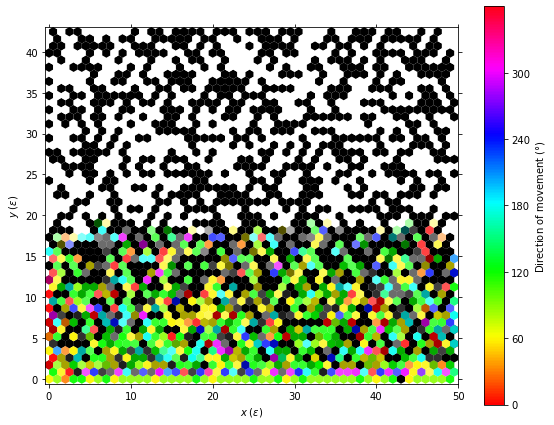

In [137]:
lgca.plot_density(lgca.ecm[lgca.nonborder], cmap='Greys', vmax=1, figindex=0, cbar=False)
lgca.plot_flux(cbar=True, figindex=0)
#lgca.plot_density(corr, figindex=0, vmax=1)

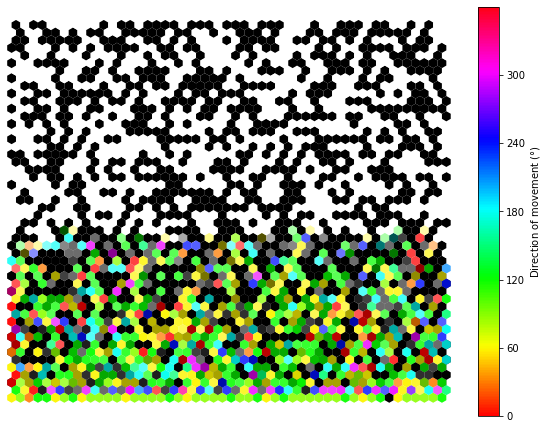

In [140]:
lgca.plot_density(lgca.ecm[lgca.nonborder], cmap='Greys', vmax=1, figindex=0, cbar=False)
lgca.plot_flux(cbar=True, figindex=0)
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_alpha(0.)
ax.patch.set_alpha(0.)#ax.set_position([0, 0, 1, 1])

ax.axis('off')
plt.savefig(path+'cbar.svg', bbox_inches='tight', transparent=True)
#plt.savefig(path+'cbar.png', bbox_inches='tight', transparent=True, dpi=600)

In [112]:
nodes = np.zeros((2,2,6))
nodes[0, 0, [0, 3]] = 1
lgca = get_lgca(nodes=nodes)

Random walk interaction is used.


In [113]:
flux = lgca.calc_flux(nodes)
print(flux[0, 0])

[0.0000000e+00 1.2246468e-16]
